In [68]:
import numpy as np
import cv2 as cv
import scipy.ndimage as scidi
import matplotlib.pyplot as plt
from scipy import spatial
from scipy.spatial.distance import cdist
from sklearn import neighbors as KNN
from sklearn import metrics as MLMets


np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

In [69]:
def L1d(A,B):
    diff = abs(A-B)
    sum = np.sum((diff))
    return sum

def L2d(A,B):
    diff = A-B
    diff = diff**2
    sum = np.sum((diff))
    return np.sqrt(sum)


def LCosd(A,B):
    a = np.square(A)
    b = np.square(B)
    SumA = np.sqrt(np.sum(a))
    SumB = np.sqrt(np.sum(b))
    Cosine = np.sum(A*B)/(SumA*SumB)
    return Cosine

A= np.asarray([[1,2],[3,4]])
B= np.asarray([[1,5],[3,5]])

print(L1d(A,B))
print(L2d(A,B))
print(LCosd(A,B))

4
3.1622776601683795
0.9428090415820634


Sigma = 3
L1 = 400557.69880610774
L2 = 3795.0510897564604
Cos = 0.9819474279528657
Sigma = 5
L1 = 505621.67050390143
L2 = 4571.644214951832
Cos = 0.9737320323808079
Sigma = 7
L1 = 591743.3518245879
L2 = 5152.360428483116
Cos = 0.9665411606814935
Sigma = 9
L1 = 667006.8742601124
L2 = 5633.333117794513
Cos = 0.9598758122076226
Sigma = 11
L1 = 733715.1216676395
L2 = 6049.0260484223445
Cos = 0.9535731797495103
Sigma = 13
L1 = 792491.0399773668
L2 = 6410.492521842108
Cos = 0.947672022114669
Sigma = 15
L1 = 843935.3942564297
L2 = 6724.2543416524995
Cos = 0.9422262552265763
Sigma = 17
L1 = 888625.7831853146
L2 = 6996.932936899767
Cos = 0.937245652560689
Sigma = 19
L1 = 927529.3621370516
L2 = 7235.1142144292235
Cos = 0.9327037474779918
Sigma = 21
L1 = 961664.0812268872
L2 = 7444.895841444537
Cos = 0.9285531627930632
Sigma = 23
L1 = 991901.5943405146
L2 = 7631.660124486683
Cos = 0.9247373312311656
Sigma = 25
L1 = 1018871.5321797032
L2 = 7799.931612913726
Cos = 0.9211999697499318


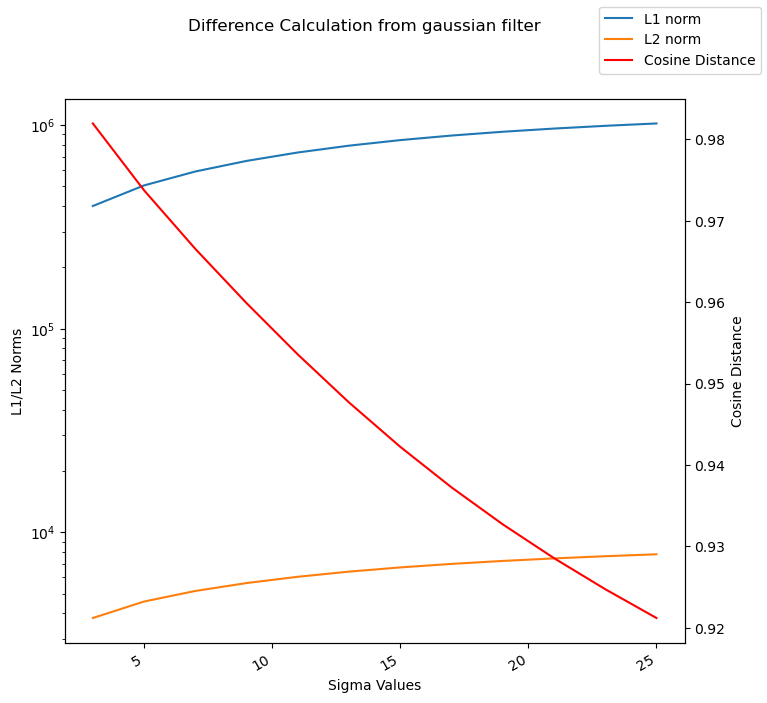

In [70]:
#Problem 2
# Write a code that takes an image, applies gaussian blur, and examines the impact of different gaussian blur on
# different Distance metrics


pic = cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
pic = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
pic = cv.resize(pic,(150,150))
pic = np.asarray(pic).astype('float64')

S1 = scidi.gaussian_filter(pic,sigma = 3)
S2 = scidi.gaussian_filter(pic,sigma = 7)
S3 = scidi.gaussian_filter(pic,sigma = 11)

cv.imwrite("HW4Q2Original.jpg",pic)
cv.imwrite("HW4Q2S3.jpg",S1)
cv.imwrite("HW4Q2S7.jpg",S2)
cv.imwrite("HW4Q2S11.jpg",S3)

X = []
L1s = []
L2s = []
LCoss = []

for i in range(3,27,2):
    S = scidi.gaussian_filter(pic,sigma = i)

    L1 = L1d(S,pic)
    L2 = L2d(S,pic)
    LCos = LCosd(S,pic)





    #L1 = np.linalg.norm((S-pic).flatten(),ord = 1)
    #L2 =  np.linalg.norm((S-pic),ord = 2)
    #LCos = 1-spatial.distance.cosine( np.asarray(S).flatten(),np.asarray(pic).flatten())
    print("Sigma = %s" %i)
    print("L1 = %s" %L1)
    print("L2 = %s" %L2)
    print("Cos = %s" %LCos)


    X.append(i)
    L1s.append(L1)
    L2s.append(L2)
    LCoss.append(LCos)

#L1s /= max(L1s)
#L2s /= max(L2s)


fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(X, L1s,label = "L1 norm" )
ax1.plot(X, L2s, label = "L2 norm")
ax2.plot(X, LCoss, label = "Cosine Distance", color = 'red')

ax1.set_xlabel("Sigma Values")
ax1.set_ylabel("L1/L2 Norms")
ax1.tick_params(axis="y")
ax1.set_yscale('log')

ax2.set_ylabel("Cosine Distance")
ax2.tick_params(axis="y")

fig.suptitle("Difference Calculation from gaussian filter")
fig.legend()
fig.autofmt_xdate()
fig.savefig('HW4Q2.png')



In [71]:
#3 asks us to create a random noise photo
def Rescale(X):
    Min = np.min(X)
    Max = np.max(X)

    return (X)*255/Max

def G(X,d):
    N = abs(np.random.rand(X.shape[0],X.shape[1]))
    alpha = d/np.sum(N)
    Y = X+alpha*N
    Max = np.max(Y)

    return (Y)*255/Max


TestArray = np.asarray([[2,4],[1,3]])
NoiseAdded = G(TestArray,4)
np.linalg.norm((TestArray-NoiseAdded).flatten(),ord = 1)

#pic = Image.open(r"/Users/DavidChaparro/Desktop/Classes/ComputerVision/HW4SelfImage.jpg")
pic = cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
pic = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
pic = cv.resize(pic,(150,150))
pic = np.asarray(pic).astype('float64')
S1 = G((np.asarray(pic)),10**4)
S2 = G(np.asarray(pic),10**6)
S3 = G(np.asarray(pic),10**7)

print(np.linalg.norm((S1-pic).flatten(),ord = 1))
print(np.linalg.norm((S2-pic).flatten(),ord = 1))
print(np.linalg.norm((S3-pic).flatten(),ord = 1))


cv.imwrite("HW4Q3a.jpg",pic)
cv.imwrite("HW4Q3b.jpg",S1)
cv.imwrite("HW4Q3c.jpg",S2)
cv.imwrite("HW4Q3d.jpg",S3)
#Image.fromarray(np.uint8(S1)).save("HW4Q3b.jpg")
#Image.fromarray(np.uint8(S2)).save("HW4Q3c.jpg")
#Image.fromarray(np.uint8(S3)).save("HW4Q3d.jpg")






62359.444454227
468090.1422421207
1413317.6247453252


True

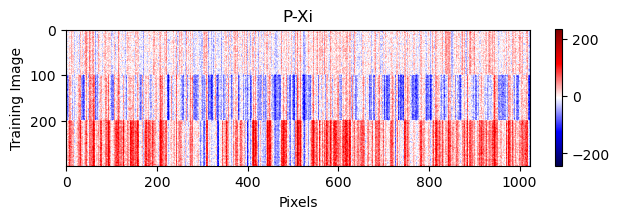

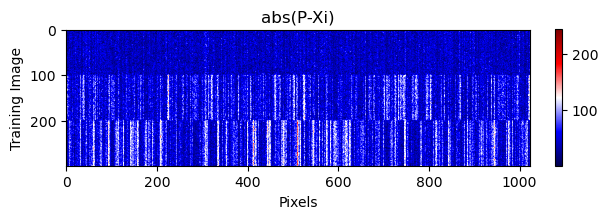

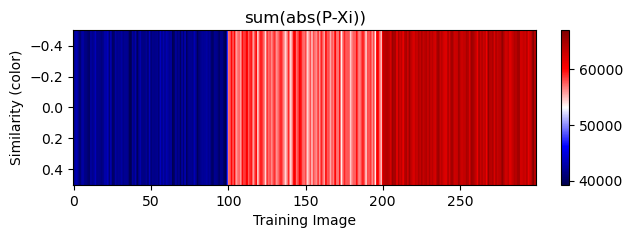

In [72]:
Me = cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
dog =  cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\dog.jpg")
cat =  cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\cat.jpg")

Me = cv.cvtColor(Me,cv.COLOR_BGR2GRAY)
Me = cv.resize(Me,(32,32))
Me = np.asarray(Me).astype('float64')

dog = cv.cvtColor(dog,cv.COLOR_BGR2GRAY)
dog = cv.resize(dog,(32,32))
dog = np.asarray(dog).astype('float64')

cat = cv.cvtColor(cat,cv.COLOR_BGR2GRAY)
cat = cv.resize(cat,(32,32))
cat = np.asarray(cat).astype('float64')


TrainingDataset= []
TrainingLabels = []


Output1 = np.zeros((300,1024))
Output2 = np.zeros((300,1024))
Output3 = np.zeros((1,300))

Exp = 5

P = G(np.asarray(Me),10**Exp)
P = Rescale(P)

for i in range(100):
    j = i+100
    k = i+200

    M = G(np.asarray(Me),10**5)
    D = G(np.asarray(dog),10**5)
    C = G(np.asarray(cat),10**5)


    TrainingDataset.append(M.flatten())
    TrainingLabels.append(1)
    TrainingDataset.append(D.flatten())
    TrainingLabels.append(2)
    TrainingDataset.append(C.flatten())
    TrainingLabels.append(3)

    Output1[i,:] = P.flatten()-M.flatten()
    Output1[j,:] = P.flatten()-D.flatten()
    Output1[k,:] = P.flatten()-C.flatten()

    Output2[i,:] = np.abs(Output1[i,:])
    Output2[j,:] = np.abs(Output1[j,:])
    Output2[k,:] = np.abs(Output1[k,:])

    Output3[0,i] = sum(Output2[i,:])
    Output3[0,j] = sum(Output2[j,:])
    Output3[0,k] = sum(Output2[k,:])

im = plt.imshow(Output1,cmap = 'seismic')
plt.title("P-Xi")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5aplot.png")
plt.show()

im = plt.imshow(Output2,cmap = 'seismic')
plt.title("abs(P-Xi)")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5bplot.png")
plt.show()

im = plt.imshow(Output3,cmap = 'seismic',aspect = 100)
plt.title("sum(abs(P-Xi))")
plt.xlabel("Training Image")
plt.ylabel("Similarity (color)")
plt.colorbar(fraction=0.047*100/300)
plt.savefig("5cplot.png")
plt.show()






In [73]:
Me = cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
dog =  cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\dog.jpg")
cat =  cv.imread(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\cat.jpg")

Me =  cv.cvtColor(Me,cv.COLOR_BGR2GRAY)
Me = cv.resize(Me,(32,32))
Me = np.asarray(Me).astype('float64')

dog = cv.cvtColor(dog,cv.COLOR_BGR2GRAY)
dog = cv.resize(dog,(32,32))
dog = np.asarray(dog).astype('float64')

cat = cv.cvtColor(cat,cv.COLOR_BGR2GRAY)
cat = cv.resize(cat,(32,32))
cat = np.asarray(cat).astype('float64')

TestSet = []
TestLabel = []
ConfusionMatrix = np.zeros((3,3))

for k in range(5,8,1):
    for i in range(10):
        TestSet.append(G(Me,10**k).flatten())
        TestLabel.append(1)
        TestSet.append(G(dog,10**k).flatten())
        TestLabel.append(2)
        TestSet.append(G(cat,10**k).flatten())
        TestLabel.append(3)


TrainingDataset = np.asarray(TrainingDataset)
TestSet = np.asarray(TestSet)



KNNClassifier = KNN.KNeighborsClassifier(n_neighbors= 3,weights='distance',metric = 'l1')
KNNClassifier.fit(TrainingDataset,TrainingLabels)
Predictions = KNNClassifier.predict(TestSet)
ConfusionMatrix = MLMets.confusion_matrix(TestLabel,Predictions)
Accuracy = MLMets.accuracy_score(TestLabel,Predictions)
print(ConfusionMatrix)
print(Accuracy)




[[14 16  0]
 [ 1 29  0]
 [ 0 19 11]]
0.6


[[1.         1.         1.         1.         1.         0.5        0.32       0.34       0.32       0.32666667 0.35333333 0.32       0.34666667 0.31333333 0.33333333]
 [1.         1.         1.         1.         1.         0.50666667 0.33333333 0.35333333 0.35333333 0.31333333 0.32666667 0.32666667 0.32666667 0.33333333 0.33333333]
 [1.         1.         1.         1.         1.         0.46666667 0.32666667 0.32       0.33333333 0.32666667 0.34       0.32       0.32       0.34       0.34      ]]


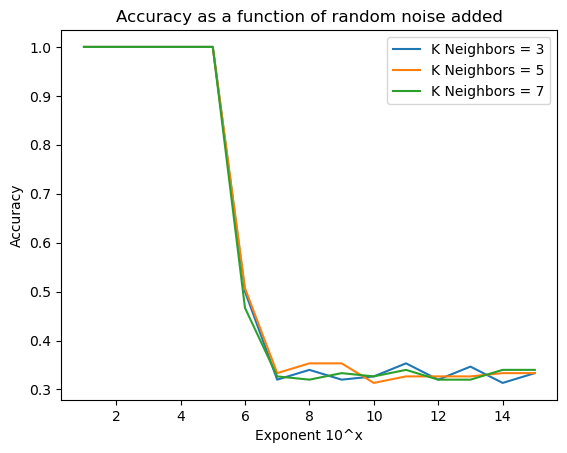

In [79]:
#Question 7: 

AccuracyMatrix = np.zeros((3,15))
BIGD = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for yindex,d in enumerate(BIGD):
    for xindex,k in enumerate([3,5,7]):
        TempTestSet = []
        TempTestLabels = []
        for i in range(50): #Generate Testing Dataset
            TempTestSet.append(G(Me,10**d).flatten())
            TempTestLabels.append(1)
            TempTestSet.append(G(dog,10**d).flatten())
            TempTestLabels.append(2)
            TempTestSet.append(G(cat,10**d).flatten())
            TempTestLabels.append(3)


        ExperimentalClassifier = KNN.KNeighborsClassifier(n_neighbors= k,weights='distance',metric = 'l1')
        ExperimentalClassifier.fit(TrainingDataset,TrainingLabels)
        ExperimentalPredictions = ExperimentalClassifier.predict(TempTestSet)
        ExperimentalAccuracy = MLMets.accuracy_score(TempTestLabels,ExperimentalPredictions)
        AccuracyMatrix[xindex,yindex] = ExperimentalAccuracy

print(AccuracyMatrix)
plt.plot(BIGD,AccuracyMatrix[0,:],label = "K Neighbors = 3")
plt.plot(BIGD,AccuracyMatrix[1,:],label = "K Neighbors = 5")
plt.plot(BIGD,AccuracyMatrix[2,:],label = "K Neighbors = 7")
plt.legend()
plt.xlabel("Exponent 10^x")
plt.ylabel("Accuracy")
plt.title("Accuracy as a function of random noise added")
plt.savefig("HW4Q7.png")
plt.show()

